# Perceptron



In [1]:
import numpy as np
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Perceptron Network

In [2]:
# Here I am building a normal forward propogation for a perceptron layer
# and the various function i would use.

In [3]:
#############################################
## Declaring Training Data        ############
#############################################
X_train = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_train = np.array([[1],[0],[0],[0]])



In [4]:
from MultiLayerPerceptron import MultiLayerPerceptron

In [5]:
def accuracy(model , X , Y):
    pred,_ = model.forward(X)
    pred =pred > 0.5
    acc = np.sum(pred == Y)
    acc = float(acc) / Y.shape[0]
    return acc

In [6]:
# Declare a neuron with shape of weights as [shape_of_input,1]
model = MultiLayerPerceptron([2,1],['sigmoid'])
# print(model.layers[1].W)
# print(model.layers[1].b)

(2, 1) (1,)
<function sigmoid at 0x7f7ad41649d8>


In [7]:
# testing the model outputs
pred , _ = model.forward(X_train)
# print(np.sum((pred > 0.5)== Y_train) / Y_train.shape[0])
# accuracy(model , X_train,Y_train)
# X_train[0]

In [8]:
# Checking for testing purposes(BCE should be used here ideally)
from Loss import mean_abs_error,mean_square_error
loss,d_back = mean_square_error(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [0.05013281]
And the error to be back propogated is:
 [[-0.125     ]
 [ 0.06045905]
 [ 0.07074433]
 [ 0.02795263]]


In [9]:
from Loss import binary_cross_entropy,mean_binary_cross_entropy
loss,d_back = binary_cross_entropy(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [1.42122101]
And the error to be back propogated is:
 [[-2.        ]
 [ 1.31897619]
 [ 1.39465605]
 [ 1.12588588]]


In [10]:
# Now we can train the model by iteratively on each datapoint.

layer_list = [2,3, 1]
activation_list = ['sigmoid','sigmoid']
model = MultiLayerPerceptron(layer_list,activation_list)

def train(model ,X_train , Y_train,epochs,alpha =0.1):
    for i in range(epochs):
        act , cache = model.forward(X_train)
        loss,d_back= mean_binary_cross_entropy(act,Y_train)
        acc = accuracy(model ,X_train,Y_train)
        print("The training loss at {}th epoch : {}  Training Accuracy:{}".format(i , loss , acc))
        model.update_gradient(cache,d_back,alpha)        

train(model , X_train,Y_train , 20,alpha = 0.4)
    

(2, 3) (3,)
<function sigmoid at 0x7f7ad41649d8>
(3, 1) (1,)
<function sigmoid at 0x7f7ad41649d8>
The training loss at 0th epoch : [0.84000479]  Training Accuracy:0.25
The training loss at 1th epoch : [0.793336]  Training Accuracy:0.25
The training loss at 2th epoch : [0.7532723]  Training Accuracy:0.25
The training loss at 3th epoch : [0.71831347]  Training Accuracy:0.25
The training loss at 4th epoch : [0.68736137]  Training Accuracy:0.5
The training loss at 5th epoch : [0.65960762]  Training Accuracy:0.75
The training loss at 6th epoch : [0.63445244]  Training Accuracy:0.75
The training loss at 7th epoch : [0.61144594]  Training Accuracy:0.75
The training loss at 8th epoch : [0.59024571]  Training Accuracy:0.75
The training loss at 9th epoch : [0.57058627]  Training Accuracy:0.75
The training loss at 10th epoch : [0.55225723]  Training Accuracy:0.75
The training loss at 11th epoch : [0.53508789]  Training Accuracy:0.75
The training loss at 12th epoch : [0.5189365]  Training Accuracy

In [11]:
# Now we can predict the values for unseen data or trained data also
# We can also calculate the accuracy of the model we have trained
accuracy(model , X_train,Y_train)

1.0

# N Bit XOR

Now Lets try working with just a little better data. A n XOR operator. So lets create the dataset for n bit xor.

We would have atmost 2^n data point in this type of data set.BUt we would limit our dataset to a 1000 data points
whichever is smaller.

Then we can divide into training and test set

In [12]:

n = 10
max_datapoint = 10000
datapoints = min(pow(2,n) , max_datapoint)

X = np.zeros((datapoints , n) , dtype=np.int32)
Y = np.zeros((datapoints , 1), dtype=np.int32)

for i in range(datapoints):
    tmp = i
    y_tmp = 0
    for j in range(n-1 , -1 , -1):
        X[i,j] = tmp&1
        y_tmp = y_tmp^X[i,j]
        tmp = tmp>>1
    Y[i] = y_tmp
        
        

In [13]:
# for sanity check lets print one example
ind = 11
print(X[ind] , Y[ind])

[0 0 0 0 0 0 1 0 1 1] [1]


In [14]:
# Lets divide the set in training and testing
div = 0.9
train_n = int(div * datapoints)
X_train = X[:train_n]
Y_train = Y[:train_n]

X_test = X[train_n:]
Y_test = Y[train_n:]
Y_test.shape

(103, 1)

In [15]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','tanh','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7f7ad4164620>
(20, 20) (20,)
<function sigmoid at 0x7f7ad41649d8>
(20, 15) (15,)
<function sigmoid at 0x7f7ad41649d8>
(15, 8) (8,)
<function sigmoid at 0x7f7ad41649d8>
(8, 4) (4,)
<function tanh at 0x7f7ad4164950>
(4, 1) (1,)
<function sigmoid at 0x7f7ad41649d8>


In [16]:
def train_recording(model,
                    X_train , 
                    Y_train,
                    epochs=200,
                    record_at = 100,
                    verbose = True,
                    learning_rate =0.1,
                    learning_rate_decay = False):
    train_loss_his = []
    train_acc_his = []
    test_loss_his = []
    test_acc_his = []
    epoch_his = []
    
    for i in range(epochs):
        prediction , cache = model.forward(X_train)
        loss,d_back= mean_binary_cross_entropy(prediction,Y_train)        
        model.update_gradient(cache,d_back,learning_rate)
        if learning_rate_decay:
            learning_rate *= (1.0 / 1.0 + i)
        
        
        
        if i % record_at == 0:
            train_loss,_ = mean_binary_cross_entropy(prediction,Y_train)
            train_acc = accuracy(model ,X_train,Y_train)
            
            test_prediction , _ = model.forward(X_test)
            test_loss,_ = mean_binary_cross_entropy(test_prediction,Y_test)
            test_acc = accuracy(model,X_test,Y_test)
            
            train_loss_his.append(train_loss)
            train_acc_his.append(train_acc)
            test_loss_his.append(test_loss)
            test_acc_his.append(test_acc)
            epoch_his.append(i)
            
            if verbose:
                print("{}th EPOCH:\nTraining Loss:{}|Training Accuracy:{}|Test Loss:{}|Test Accuracy:{}".\
                  format(i , train_loss , train_acc,test_loss,test_acc))
    train_loss_his = np.array(train_loss_his).reshape(-1)
    train_acc_his = np.array(train_acc_his).reshape(-1)
    test_loss_his = np.array(test_loss_his).reshape(-1)
    test_acc_his = np.array(test_acc_his).reshape(-1)
    epoch_his = np.array(epoch_his).reshape(-1)
    return train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his

In [17]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','tanh','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7f7ad4164620>
(20, 20) (20,)
<function sigmoid at 0x7f7ad41649d8>
(20, 15) (15,)
<function sigmoid at 0x7f7ad41649d8>
(15, 8) (8,)
<function sigmoid at 0x7f7ad41649d8>
(8, 4) (4,)
<function tanh at 0x7f7ad4164950>
(4, 1) (1,)
<function sigmoid at 0x7f7ad41649d8>


In [18]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = train_recording(model , 
                                                                                    X_train,
                                                                                    Y_train , 
                                                                                    epochs = 500,
                                                                                    record_at = 20,
                                                                                    learning_rate= 0.1,
                                                                                    learning_rate_decay=False)

0th EPOCH:
Training Loss:[0.69328813]|Training Accuracy:0.500542888165038|Test Loss:[0.69342558]|Test Accuracy:0.49514563106796117
20th EPOCH:
Training Loss:[0.69315861]|Training Accuracy:0.49728555917481|Test Loss:[0.69318117]|Test Accuracy:0.47572815533980584
40th EPOCH:
Training Loss:[0.69315672]|Training Accuracy:0.496199782844734|Test Loss:[0.69316309]|Test Accuracy:0.49514563106796117
60th EPOCH:
Training Loss:[0.69315664]|Training Accuracy:0.49728555917481|Test Loss:[0.69316115]|Test Accuracy:0.49514563106796117
80th EPOCH:
Training Loss:[0.69315659]|Training Accuracy:0.499457111834962|Test Loss:[0.69316098]|Test Accuracy:0.49514563106796117
100th EPOCH:
Training Loss:[0.69315653]|Training Accuracy:0.498371335504886|Test Loss:[0.69316101]|Test Accuracy:0.49514563106796117
120th EPOCH:
Training Loss:[0.69315648]|Training Accuracy:0.498371335504886|Test Loss:[0.69316107]|Test Accuracy:0.49514563106796117
140th EPOCH:
Training Loss:[0.69315643]|Training Accuracy:0.499457111834962|T

In [19]:
import matplotlib.pyplot as plt


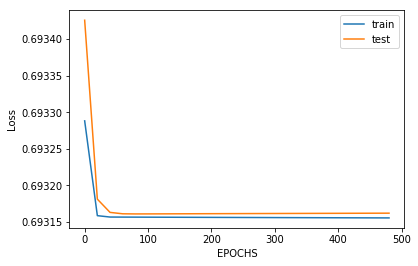

In [20]:
train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend([train_line, test_line] , ['train','test'])
plt.show()

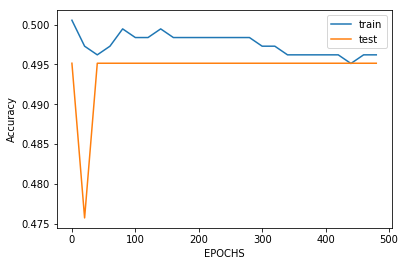

In [21]:
train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend([train_line, test_line] , ['train','test'])
plt.show()
plt.show()